<div class="alert alert-block alert-success">
    
# Spatial Data Analysis and Optimization of Melbourne Transport Hub
#### Author Name: QI WANG


Date: 14/10/2023


Environment: Python 3

Libraries used:<br>
**pandas**: For data manipulation, analysis, and data structures.<br>
**datetime**: For handling and manipulating date and time data.<br>
**fitz**: For working with PDF and other document formats.<br>
**geopandas**: Provides tools for working with spatial data, extending the capabilities of pandas.<br>
**shapely**: For manipulation and analysis of planar geometric objects.<br>
**re**: For regular expression operations, to search, match, and manipulate strings.<br>
**math**: For basic mathematical and trigonometric calculations.<br>
**sklearn.preprocessing**: Specifically, StandardScaler for standardizing features by removing the mean and scaling to unit variance.<br>
**scipy.stats**: Provides a wide variety of statistical functions, with boxcox for performing Box-Cox power transformations.<br>
**matplotlib**: For plotting and visualization of data.<br>
**seaborn**: Based on matplotlib, provides a higher-level interface for creating attractive graphics.<br>
**numpy**: For numerical operations, handling arrays, and mathematical functions.<br>

</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Task1](#task1) <br>
[4. Task2](#task2) <br>
[5. Summary](#summary) <br>
[6. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

In today's data-driven era, data integration and parsing have become crucial. Various data sources and formats present challenges, but they also offer opportunities, enabling us to extract meaningful insights. In the process of data-driven decision-making, the quality and manner in which data is formatted play a pivotal role in the accuracy and reliability of the results. This project comprises two key tasks, aiming to handle, integrate, and optimize data, laying the groundwork for further analysis and modeling.

Data integration is the cornerstone of data analysis. In Task 1, we delve deeply into the challenges of integrating data from multiple sources into a single dataset. The form and distribution of data profoundly influence the choice of analytical methods and the ultimate results. Task 2 is centered around data reshaping, with a particular focus on exploring various normalization and transformation methods, such as standardization, min-max normalization, log transformation, power transformation, and Box-Cox transformation.



-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:


* **pandas**: For data manipulation, analysis, and data structures.
* **datetime**: For handling and manipulating date and time data.
* **fitz**: For working with PDF and other document formats.
* **BeautifulSoup (from bs4)**: Used for web scraping purposes to pull the data out of HTML and XML documents. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner.
* **geopandas**: Provides tools for working with spatial data, extending the capabilities of pandas.
* **shapely**: For manipulation and analysis of planar geometric objects.
* **re**: For regular expression operations, to search, match, and manipulate strings.
* **math**: For basic mathematical and trigonometric calculations.
* **sklearn.preprocessing**: Specifically, `StandardScaler` for standardizing features by removing the mean and scaling to unit variance.
* **scipy.stats**: Provides a wide variety of statistical functions, with `boxcox` for performing Box-Cox power transformations.
* **matplotlib**: For plotting and visualization of data.
* **seaborn**: Based on matplotlib, provides a higher-level interface for creating attractive graphics.
* **numpy**: For numerical operations, handling arrays, and mathematical functions.




----

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import datetime as datetime
from bs4 import BeautifulSoup
import fitz
import geopandas as gpd
from shapely.geometry import Point
import re
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



-------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Task1: Data Integration  <a class="anchor" name="load"></a>

</div>

#### Load Data

In [3]:
df_jason = pd.read_json("33354081.json")
df_jason.head()


,property_id,lat,lng,addr_street
0,20769,-37.756310,144.958633,20 Murdock Street
1,41762,-37.738043,145.088549,19 O'Donnell Street
2,3884,-37.814566,144.886466,8 Free Street
3,40504,-37.690868,145.044238,38 Virginia Crescent
4,5541,-37.792870,144.847107,16 Pritchard Avenue


I fixed two errors in original xml file, and then I can load the xml file successfully.

In [4]:
# read and parse XML file 
with open("33354081.xml", "r") as file:
    soup = BeautifulSoup(file, "xml")

# retrive all records
records = []
for item in soup.find_all("property"):  
    record = {}
    for child in item.children:
        if child.name:
            record[child.name] = child.text
    records.append(record)

# create DataFrame
df_xml = pd.DataFrame(records)
df_xml

,property_id,lat,lng,addr_street
0,2759,-37.81466293,144.8821869,12 Kingston Street
1,93416,-38.017895,145.096328,49 Station Street
2,25559,-37.59619904,144.9361267,16 Dianne Avenue
3,20436,-37.763078,144.9543,122 Hope Street
4,69246,-37.853667,145.040083,62 McArthur Street
...,...,...,...,...
1099,20769,-37.75630951,144.9586334,20 Murdock Street
1100,41762,-37.738043,145.088549,19 O'Donnell Street
1101,3884,-37.814566,144.88646599999996,8 Free Street
1102,40504,-37.690868,145.04423799999995,38 Virginia Crescent


Concate two dataframes

In [5]:
concat_df = pd.concat([df_xml, df_jason], ignore_index = True)
concat_df

,property_id,lat,lng,addr_street
0,2759,-37.81466293,144.8821869,12 Kingston Street
1,93416,-38.017895,145.096328,49 Station Street
2,25559,-37.59619904,144.9361267,16 Dianne Avenue
3,20436,-37.763078,144.9543,122 Hope Street
4,69246,-37.853667,145.040083,62 McArthur Street
...,...,...,...,...
2208,74164,-37.906472,145.282895,4 Park Valley Way
2209,91744,-37.973879,145.046905,6 Cherbourg Avenue
2210,1014,-37.79583,144.887175,42 Adelaide Street
2211,72633,-37.850998,145.247726,9 Princess Street


Determine the suburb each property is located in, and add the suburb name to the `sb_df` dataframe.

In [6]:
sb_df = concat_df.copy()

# Step 1: Create a new GeoDataFrame with a geometry column
geometry = [Point(xy) for xy in zip(sb_df["lng"], sb_df["lat"])]
sb_gdf = gpd.GeoDataFrame(sb_df, geometry=geometry)

# Load the Shapefile as a GeoDataFrame
gdf = gpd.read_file("VIC_LOCALITY_POLYGON_shp.shp")

# Step 2: Ensure the CRS match
sb_gdf.crs = gdf.crs

# Step 3: Perform a spatial join to determine the suburb for each point
result_gdf = gpd.sjoin(sb_gdf, gdf, predicate="within", how="left")

# suburb name in the column vic_loca_2
sb_df["suburb"] = result_gdf["VIC_LOCA_2"]  

In [7]:
# retrieve lga info from pdf
pdf_document = fitz.open("Lga_to_suburb.pdf")

pdf_text = ""

for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    pdf_text += page.get_text()

pdf_document.close()
print(pdf_text)


BANYULE : ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington'] 
BRIMBANK : ['Altona', 'Altona North', 'Armadale', 'Ascot Vale'] 
DAREBIN : ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava'] 
HOBSONS BAY : ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East'] 
HUME : ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East'] 
MARIBYRNONG : ['Brunswick', 'Brunswick West', 'Bulleen', 'Burwood'] 
MELBOURNE : ['Camberwell', 'Canterbury', 'Carlton North', 'Carnegie'] 
MELTON : ['Caulfield', 'Caulfield North', 'Caulfield South', 'Chadstone'] 
MOONEE VALLEY : ['Clifton Hill', 'Coburg', 'Coburg North', 'Collingwood'] 
MORELAND : ['Doncaster', 'Eaglemont', 'Elsternwick', 'Elwood'] 
NILLUMBIK : ['Essendon', 'Essendon North', 'Fairfield', 'Fitzroy', 'Plenty'] 
WHITTLESEA : ['Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris'] 
WYNDHAM : ['Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton'] 
YARRA : ['Hampton East', 'Hawthorn', 'Heidelberg Heights', 'Heidelberg West'] 
BASS COAST : ['Hu

create dataframe with column lga and suburb infomation

In [8]:
lines = pdf_text.strip().split("\n")

data = []

for line in lines:
    # split lga and suburb 
    lga, suburbs_str = line.split(":")
    # use regex to retrive suburb
    suburbs = re.findall(r"'(.*?)'", suburbs_str)
    for suburb in suburbs:
        data.append({"suburb": suburb,"lga": lga})

df = pd.DataFrame(data)
df

,suburb,lga
0,Abbotsford,BANYULE
1,Airport West,BANYULE
2,Albert Park,BANYULE
3,Alphington,BANYULE
4,Altona,BRIMBANK
...,...,...
330,Plumpton,WARRNAMBOOL
331,Monbulk,WARRNAMBOOL
332,Manor Lakes,WARRNAMBOOL
333,Harkness,WARRNAMBOOL


Reference sample out put ,lga and Suburb are upcase format

In [9]:
# Convert lga and Suburb to upcase
df['lga'] = df['lga'].str.upper()
df['suburb'] = df['suburb'].str.upper()
df


,suburb,lga
0,ABBOTSFORD,BANYULE
1,AIRPORT WEST,BANYULE
2,ALBERT PARK,BANYULE
3,ALPHINGTON,BANYULE
4,ALTONA,BRIMBANK
...,...,...
330,PLUMPTON,WARRNAMBOOL
331,MONBULK,WARRNAMBOOL
332,MANOR LAKES,WARRNAMBOOL
333,HARKNESS,WARRNAMBOOL


-----

Combining two dataframes based on the suburb they are associated with

In [10]:
merged_df = pd.merge(sb_df,df,on = "suburb", how = "left")
merged_df

,property_id,lat,lng,addr_street,suburb,lga
0,2759,-37.81466293,144.8821869,12 Kingston Street,YARRAVILLE,MITCHELL
1,93416,-38.017895,145.096328,49 Station Street,ASPENDALE,YARRIAMBIACK
2,25559,-37.59619904,144.9361267,16 Dianne Avenue,CRAIGIEBURN,YARRA RANGES
3,20436,-37.763078,144.9543,122 Hope Street,BRUNSWICK,MARIBYRNONG
4,69246,-37.853667,145.040083,62 McArthur Street,MALVERN,BAW BAW
...,...,...,...,...,...,...
2208,74164,-37.906472,145.282895,4 Park Valley Way,LYSTERFIELD,BALLARAT
2209,91744,-37.973879,145.046905,6 Cherbourg Avenue,BEAUMARIS,TOWONG
2210,1014,-37.79583,144.887175,42 Adelaide Street,FOOTSCRAY,WHITTLESEA
2211,72633,-37.850998,145.247726,9 Princess Street,BAYSWATER,INDIGO


-------------------------------------

Caculate distance from the closest train station to the property

In [11]:
# create stops information dataframe
stops = pd.read_csv("stops.txt", sep = ",")
stops

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
...,...,...,...,...,...
213,44817,Coolaroo Railway Station,Coolaroo,-37.661003,144.926056
214,45793,Lynbrook Railway Station,Lynbrook,-38.057341,145.249275
215,45794,Cardinia Road Railway Station,Pakenham,-38.071290,145.437791
216,45795,South Morang Railway Station,South Morang,-37.649159,145.067032


In [12]:
# define haversine function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378  # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# define closest_station function
def closest_station(lat, lng):
    closest_distance = float('inf')  # Initialize the closest distance to infinity
    closest_station_info = None  # Initialize the nearest site information to None
    for index, row in stops.iterrows():  
        distance = haversine(lng, lat, row['stop_lon'], row['stop_lat'])  
        if distance < closest_distance:  
            closest_distance = distance
            closest_station_info = row
    return pd.Series({'closest_train_station_id': int(closest_station_info['stop_id']),
                      'distance_to_closest_train_station': round(closest_distance,2)})

# Converting lat and lng columns to numeric data types
merged_df['lat'] = pd.to_numeric(merged_df['lat'], errors='coerce')
merged_df['lng'] = pd.to_numeric(merged_df['lng'], errors='coerce')

# Use the apply method to apply the closest_station function
result = merged_df.apply(lambda row: closest_station(row['lat'], row['lng']), axis=1)

df_final = pd.concat([merged_df, result], axis=1)

df_final['closest_train_station_id'] = df_final['closest_train_station_id'].astype(int)

df_final

,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station
0,2759,-37.814663,144.882187,12 Kingston Street,YARRAVILLE,MITCHELL,19996,0.69
1,93416,-38.017895,145.096328,49 Station Street,ASPENDALE,YARRIAMBIACK,19862,1.16
2,25559,-37.596199,144.936127,16 Dianne Avenue,CRAIGIEBURN,YARRA RANGES,40221,0.89
3,20436,-37.763078,144.954300,122 Hope Street,BRUNSWICK,MARIBYRNONG,19967,0.60
4,69246,-37.853667,145.040083,62 McArthur Street,MALVERN,BAW BAW,19911,0.50
...,...,...,...,...,...,...,...,...
2208,74164,-37.906472,145.282895,4 Park Valley Way,LYSTERFIELD,BALLARAT,19867,2.65
2209,91744,-37.973879,145.046905,6 Cherbourg Avenue,BEAUMARIS,TOWONG,19866,1.05
2210,1014,-37.795830,144.887175,42 Adelaide Street,FOOTSCRAY,WHITTLESEA,20023,0.69
2211,72633,-37.850998,145.247726,9 Princess Street,BAYSWATER,INDIGO,19870,2.07


I reffer [here](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points) to caculate distance

-----

Detect if the closest station has direct train to melbourne central station

In [13]:
# check central station stop id
mc = stops[stops["stop_name"] == "Melbourne Central Railway Station"]
mc

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
17,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594


In [14]:
calender = pd.read_csv("calendar.txt")
calender


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


Through my observation, only T0 has train service from monday to friday.

In [15]:
stop_times = pd.read_csv("stop_times.txt")
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
390300,17199140.UJ.2-ain-mjp-1.4.R,18:09:00,18:09:00,20028,1,NaN,0,0,0.000000
390301,17199140.UJ.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109
390302,17199140.UJ.2-ain-mjp-1.4.R,18:19:00,18:19:00,22180,5,NaN,0,0,5676.741894
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000


By observation, there are also T0 tags in the trip_id column. Therefore, I only select the trip id that contain the T0 tag to filter the trips I need.

In [16]:
# Filtering the stop_times DataFrame to retain only those rows where the 'trip_id' string contains 'T0'
weekday_stop_times = stop_times[stop_times['trip_id'].str.contains('T0')]

# Identifying the unique trip IDs that stop at the Melbourne Central Station (stop_id 19842) on weekdays.
direct_trip_ids = weekday_stop_times[weekday_stop_times['stop_id'] == 19842]['trip_id'].unique().tolist()

# Filtering the stop_times DataFrame to retain only the rows corresponding to the identified weekday trips
direct_all = stop_times[stop_times['trip_id'].isin(direct_trip_ids)]

def compute_direct_journey_flag(row):
    closest_station_id = row['closest_train_station_id']
    closest_station_records = direct_all[direct_all['stop_id'] == closest_station_id]
    melbourne_central_records = direct_all[direct_all['stop_id'] == 19842]
    
    if melbourne_central_records.empty or closest_station_records.empty:
        return 0  # Return 0 if no records found
    
    melbourne_sequence = melbourne_central_records['stop_sequence'].iloc[0]
    
    # Check if the closest station comes before Melbourne Central Station in the trip sequence
    has_direct_journey = any(
        (record['stop_sequence'] < melbourne_sequence) and 
        ('07:00:00' <= record['departure_time'] <= '09:00:00') 
        for idx, record in closest_station_records.iterrows()
    )
    
    return 1 if has_direct_journey else 0

df_final['direct_journey_flag'] = df_final.apply(compute_direct_journey_flag, axis=1)


----

Calculate average travel time (in minutes) for a direct ride from the nearest train station to "Melbourne Central" station between 7 a.m. and 9 a.m., Monday through Friday.

In [17]:
# Functions to fix time formatting
def fix_time_format(t):
    hour, minute, second = map(int, t.split(':'))
    hour = hour % 24  # Convert 24 hours to 0 hours
    return f'{hour:02d}:{minute:02d}:{second:02d}'  # Formatted time is HH:mm:ss
direct_all['arrival_time'] = direct_all['arrival_time'].apply(fix_time_format)
direct_all['departure_time'] = direct_all['departure_time'].apply(fix_time_format)

/var/folders/yg/gl7dtszx74q1x0yqng7jgwx00000gn/T/ipykernel_82251/3460679953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_all['arrival_time'] = direct_all['arrival_time'].apply(fix_time_format)
/var/folders/yg/gl7dtszx74q1x0yqng7jgwx00000gn/T/ipykernel_82251/3460679953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_all['departure_time'] = direct_all['departure_time'].apply(fix_time_format)


I fixed the time format first, because in time column has some error format.

In [18]:
# Pre-filter the direct_all dataframe based on the unique closest_train_station_id values in df_final
unique_stations = df_final['closest_train_station_id'].unique()
direct_all_filtered = direct_all[direct_all['stop_id'].isin(unique_stations) | (direct_all['stop_id'] == 19842)]

# Reset the index on direct_all_filtered
direct_all_filtered.reset_index(inplace=True)

def travel_time(row):
    closest_station_id = row['closest_train_station_id']
    if closest_station_id == 19842:  
        return 0

    # Extract the necessary records from the dataframe
    closest_station_records = direct_all_filtered[direct_all_filtered['stop_id'] == closest_station_id]
    melbourne_records = direct_all_filtered[direct_all_filtered['stop_id'] == 19842]
    
    # Merge the two dataframes to easily compare stop_sequence
    merged = pd.merge(closest_station_records, melbourne_records, on='trip_id', suffixes=('_closest', '_melbourne'))
    merged = merged[merged['stop_sequence_closest'] < merged['stop_sequence_melbourne']]
    
    # Filter out records based on time criteria
    valid_times = merged[
        (merged['departure_time_closest'] >= '07:00:00') & 
        (merged['departure_time_closest'] <= '09:00:00')
    ]
    
    # Calculate travel times
    valid_times['departure_time'] = pd.to_datetime(valid_times['departure_time_closest'])
    valid_times['arrival_time'] = pd.to_datetime(valid_times['arrival_time_melbourne'])
    valid_times['travel_time'] = (valid_times['arrival_time'] - valid_times['departure_time']).dt.seconds / 60
    
    # Calculate and return average travel time
    if not valid_times.empty:
        return round(valid_times['travel_time'].mean())
    else:
        return "no direct trip is available"

# Apply the function on the chunk
df_final['travel_min_to_MC'] = df_final.apply(travel_time, axis=1)

# Display a sample of the results
df_final


,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,direct_journey_flag,travel_min_to_MC
0,2759,-37.814663,144.882187,12 Kingston Street,YARRAVILLE,MITCHELL,19996,0.69,0,no direct trip is available
1,93416,-38.017895,145.096328,49 Station Street,ASPENDALE,YARRIAMBIACK,19862,1.16,1,51
2,25559,-37.596199,144.936127,16 Dianne Avenue,CRAIGIEBURN,YARRA RANGES,40221,0.89,1,41
3,20436,-37.763078,144.954300,122 Hope Street,BRUNSWICK,MARIBYRNONG,19967,0.60,1,18
4,69246,-37.853667,145.040083,62 McArthur Street,MALVERN,BAW BAW,19911,0.50,1,no direct trip is available
...,...,...,...,...,...,...,...,...,...,...
2208,74164,-37.906472,145.282895,4 Park Valley Way,LYSTERFIELD,BALLARAT,19867,2.65,1,49
2209,91744,-37.973879,145.046905,6 Cherbourg Avenue,BEAUMARIS,TOWONG,19866,1.05,1,40
2210,1014,-37.795830,144.887175,42 Adelaide Street,FOOTSCRAY,WHITTLESEA,20023,0.69,1,15
2211,72633,-37.850998,145.247726,9 Princess Street,BAYSWATER,INDIGO,19870,2.07,1,41


----

Reorder the column according to the sample output 

In [19]:
# Desired column order
desired_order = [
    "property_id", "lat", "lng", "addr_street", "suburb", "lga", 
    "closest_train_station_id", "distance_to_closest_train_station", 
    "travel_min_to_MC", "direct_journey_flag"
]

# Reorder columns
reordered = df_final[desired_order]

# Display the first few rows of the reordered dataframe
reordered.head()


,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag
0,2759,-37.814663,144.882187,12 Kingston Street,YARRAVILLE,MITCHELL,19996,0.69,no direct trip is available,0
1,93416,-38.017895,145.096328,49 Station Street,ASPENDALE,YARRIAMBIACK,19862,1.16,51,1
2,25559,-37.596199,144.936127,16 Dianne Avenue,CRAIGIEBURN,YARRA RANGES,40221,0.89,41,1
3,20436,-37.763078,144.954300,122 Hope Street,BRUNSWICK,MARIBYRNONG,19967,0.60,18,1
4,69246,-37.853667,145.040083,62 McArthur Street,MALVERN,BAW BAW,19911,0.50,no direct trip is available,1


In [20]:
reordered.to_csv("33354081_A3_output.csv", index=False)


-----

<div class="alert alert-block alert-warning">

## 4.  Task2: Datareshaping  <a class="anchor" name="load"></a>

</div>

## Data Loading and Preliminary Exploration

In [21]:
# Load the suburb_info.xlsx data
suburb_data = pd.read_excel("suburb_info.xlsx")
suburb_data.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227


----

## Data cleaning

I noticed that the data in the columns aus_born_perc, median_income and median_house_price seem to contain some non-numeric characters such as % and $. For further data exploration and processing, I cleaned up these columns

In [22]:
# Remove non-numeric characters and convert to appropriate data types
suburb_data['aus_born_perc'] = suburb_data['aus_born_perc'].str.rstrip('%').astype('float') / 100.0
suburb_data['median_income'] = suburb_data['median_income'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)
suburb_data['median_house_price'] = suburb_data['median_house_price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Descriptive statistics of the dataset
desc_stats = suburb_data.describe()

# Check for missing values
missing_values = suburb_data.isnull().sum()

desc_stats, missing_values


(       number_of_houses  number_of_units  aus_born_perc  median_income  \
 count        202.000000       202.000000     202.000000     202.000000   
 mean        4155.767327      2480.410891       0.683663    1387.935644   
 std         3400.864988      3132.684712       0.107613     317.841321   
 min          283.000000        60.000000       0.360000     633.000000   
 25%         1973.500000       620.500000       0.620000    1182.250000   
 50%         3256.500000      1603.000000       0.700000    1393.000000   
 75%         5518.500000      3089.000000       0.770000    1560.000000   
 max        23338.000000     24380.000000       0.880000    2352.000000   
 
        median_house_price    population  
 count        2.020000e+02    202.000000  
 mean         1.218817e+06  18659.311881  
 std          4.716807e+05   9604.187282  
 min          5.072000e+05    170.000000  
 25%          8.706750e+05  12063.000000  
 50%          1.134500e+06  17583.000000  
 75%          1.467550

---

## Data exploration

In order to better understand the distribution of the data and the relationships between the features, I performed the following operations:Plot histograms for number_of_houses, number_of_units, population, aus_born_perc, median_income, and median_house_price

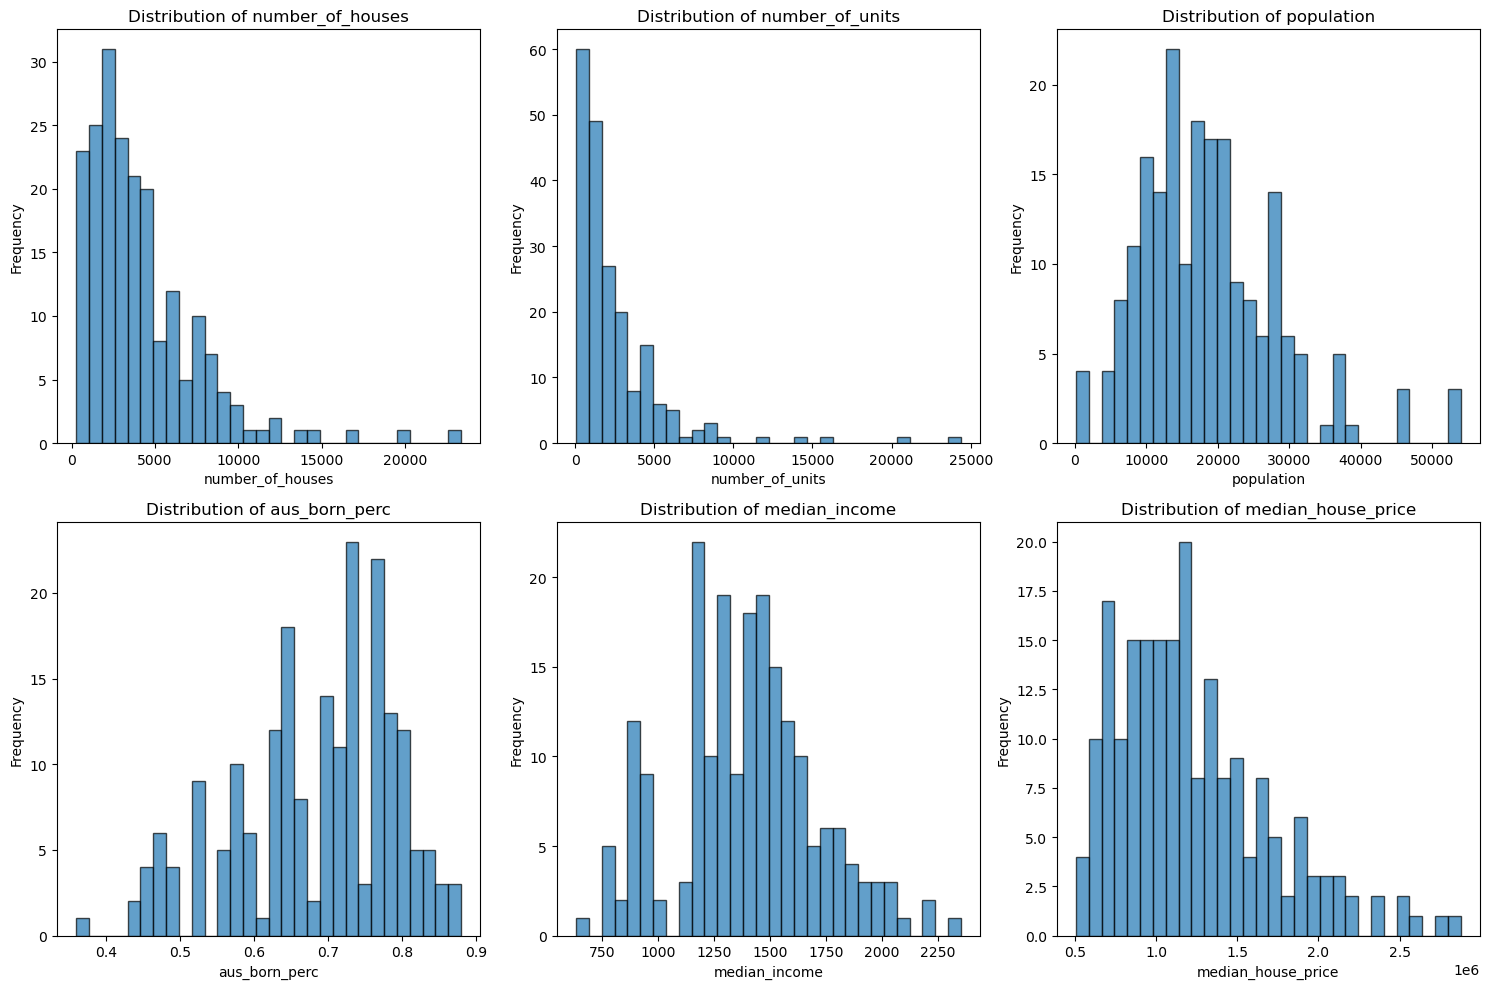

In [23]:
# List of columns to visualize
columns_to_visualize = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    plt.hist(suburb_data[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Through observation, I found that the distributions of number_of_houses, number_of_units and population are all right skewed, indicating that there are some suburbs that have significantly higher numbers of houses, units and population than most other suburbs.<br>
The distribution of aus_born_perc is relatively even, but there are some concentrations of higher and lower percentages.<br>
The distribution of median_income is also right-skewed, but most data points are concentrated in the middle range.<br>
The distribution of median_house_price is right-skewed, suggesting that most suburbs are concentrated in a lower range, but there are some that are significantly higher than others.

Next, to further explore the relationship between the target variable median_house_price and the other attributes, I will plot scatter plots for each attribute.

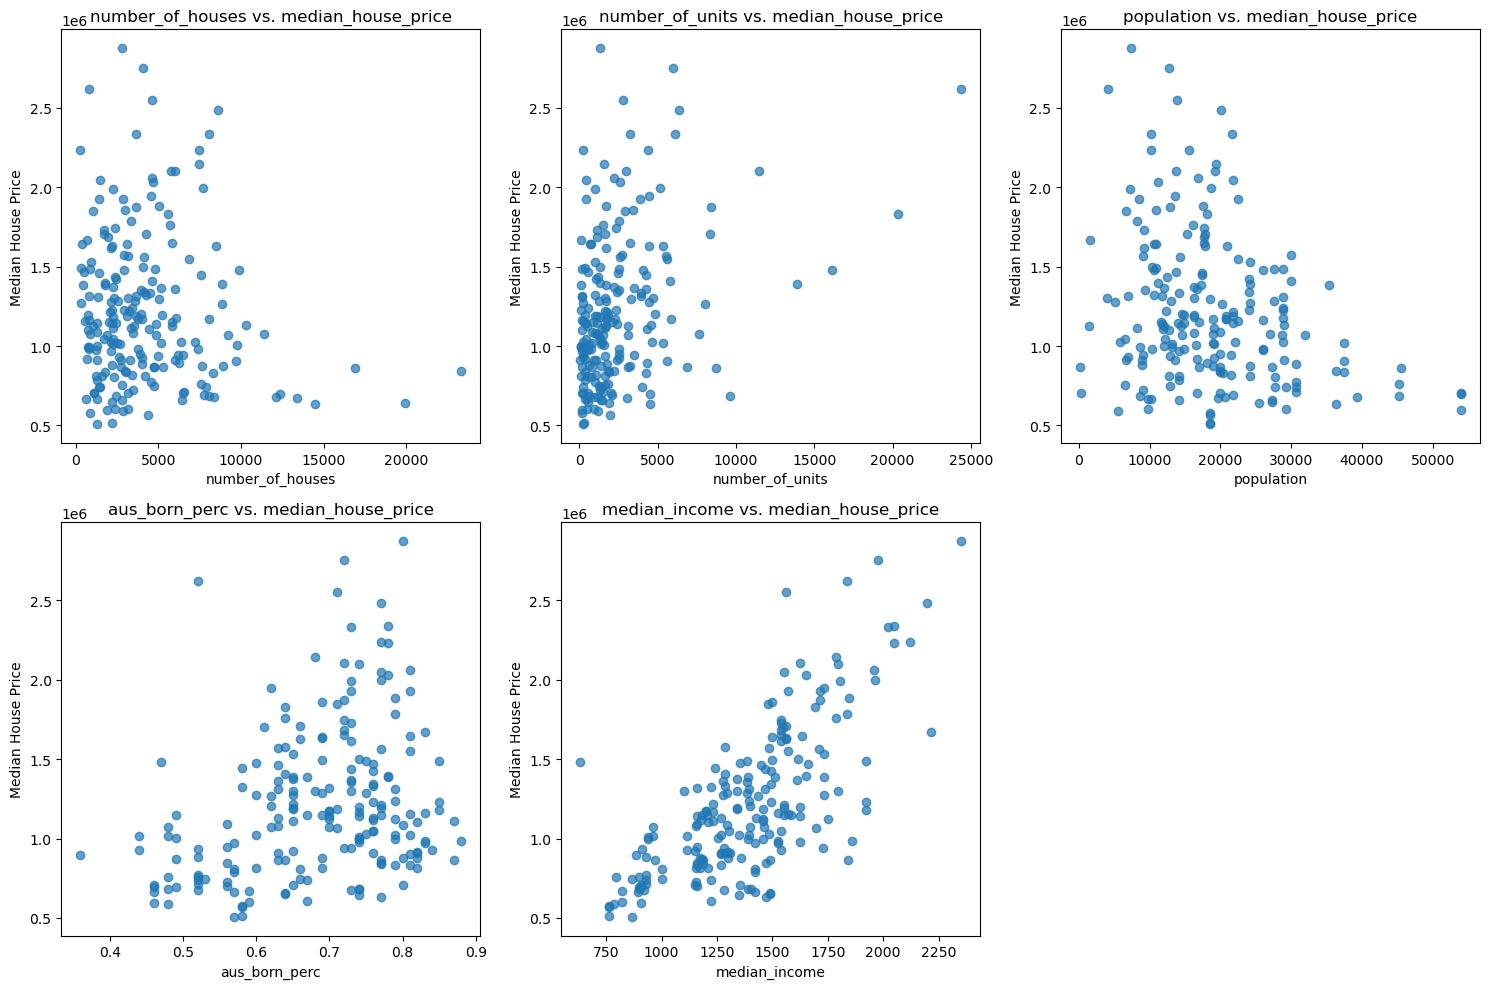

In [24]:
# Plot scatter plots for each attribute against median_house_price
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data[col], suburb_data['median_house_price'], alpha=0.7)
    plt.title(f'{col} vs. median_house_price')
    plt.xlabel(col)
    plt.ylabel('Median House Price')

plt.tight_layout()
plt.show()


Accoding to my  observation, I have the following findings.<br>
`number_of_houses`: There's no evident linear relationship with the median house price.<br>
`number_of_units`: There's also no clear linear relationship with the median house price.<br>
`population`: No noticeable linear relationship exists with the median house price.<br>
`aus_born_perc`: There seems to be a slight linear relationship with the median house price, meaning in suburbs with a higher percentage of Australian-born residents, the house prices might be relatively higher.<br>
`median_income`: There's a clear positive linear relationship with the median house price, implying that in suburbs with a higher median income, house prices are typically higher as well.<br>
Overall, a distinct linear relationship exists between `median_income` and `median_house_price`, while the relationships between other attributes and the median house price are not very pronounced

------

## Data normalization/transformation

Based on my observation, scaling or transformation is essential due to the presence of right-skewed features such as `number_of_houses` and `median_income`. Additionally, the wide variation in feature scales can bias certain algorithms. Transformations can enhance the linearity of relationships, improving model performance, while scaling ensures a consistent and interpretable impact of each feature on the model's outcome.


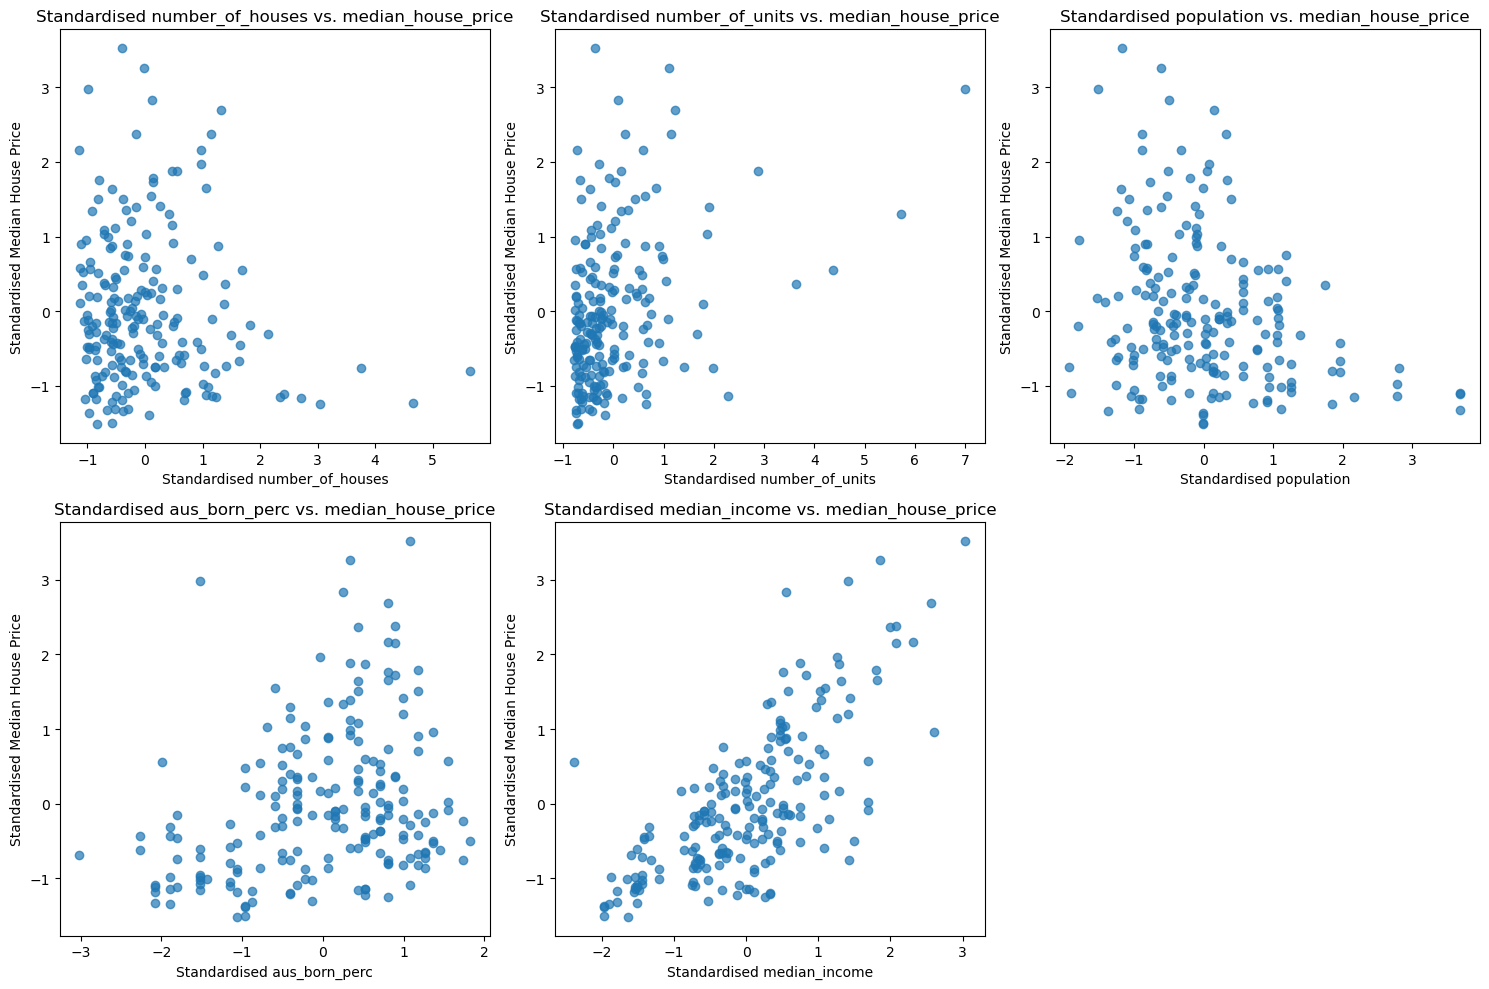

In [25]:
# Apply standardisation
standard_scaler = StandardScaler()
suburb_data_standardised = suburb_data.copy()
suburb_data_standardised[columns_to_visualize] = standard_scaler.fit_transform(suburb_data[columns_to_visualize])

# Plot scatter plots for each attribute against median_house_price after standardisation
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data_standardised[col], suburb_data_standardised['median_house_price'], alpha=0.7)
    plt.title(f'Standardised {col} vs. median_house_price')
    plt.xlabel(f'Standardised {col}')
    plt.ylabel('Standardised Median House Price')

plt.tight_layout()
plt.show()


The primary purpose of standardization is to scale all features to the same scale, ensuring that their weights in the model can be fairly compared. Although the scale of the data has changed (all features now have a mean of approximately 0 and a standard deviation of 1), the relationship between the features and the target variable remains unchanged. Compared to the original data, the linear relationship has neither strengthened nor weakened.

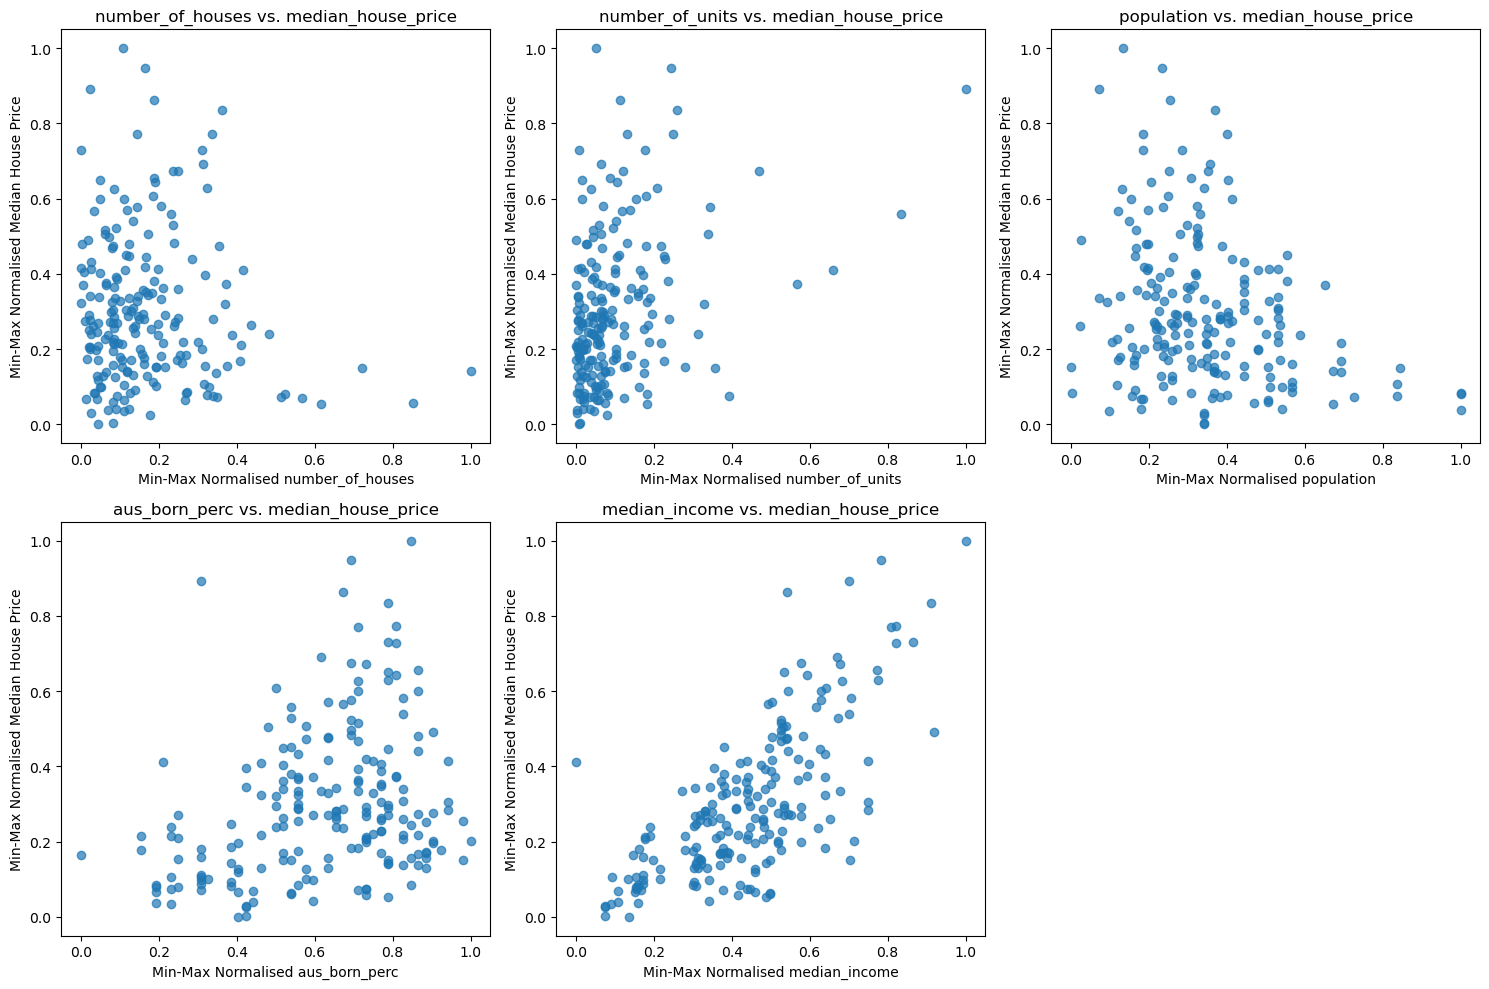

In [26]:
# Apply min-max normalization
min_max_scaler = MinMaxScaler()
suburb_data_minmax = suburb_data.copy()
suburb_data_minmax[columns_to_visualize] = min_max_scaler.fit_transform(suburb_data[columns_to_visualize])

# Plot scatter plots for each attribute against median_house_price after min-max normalization
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data_minmax[col], suburb_data_minmax['median_house_price'], alpha=0.7)
    plt.title(f'{col} vs. median_house_price')
    plt.xlabel(f'Min-Max Normalised {col}')
    plt.ylabel('Min-Max Normalised Median House Price')

plt.tight_layout()
plt.show()

Through observation, it can be noted that the min-max normalization has scaled the data, bringing it into the [0,1] range. The scale of the data has been altered, but the relationship between the features and the target variable remains consistent.

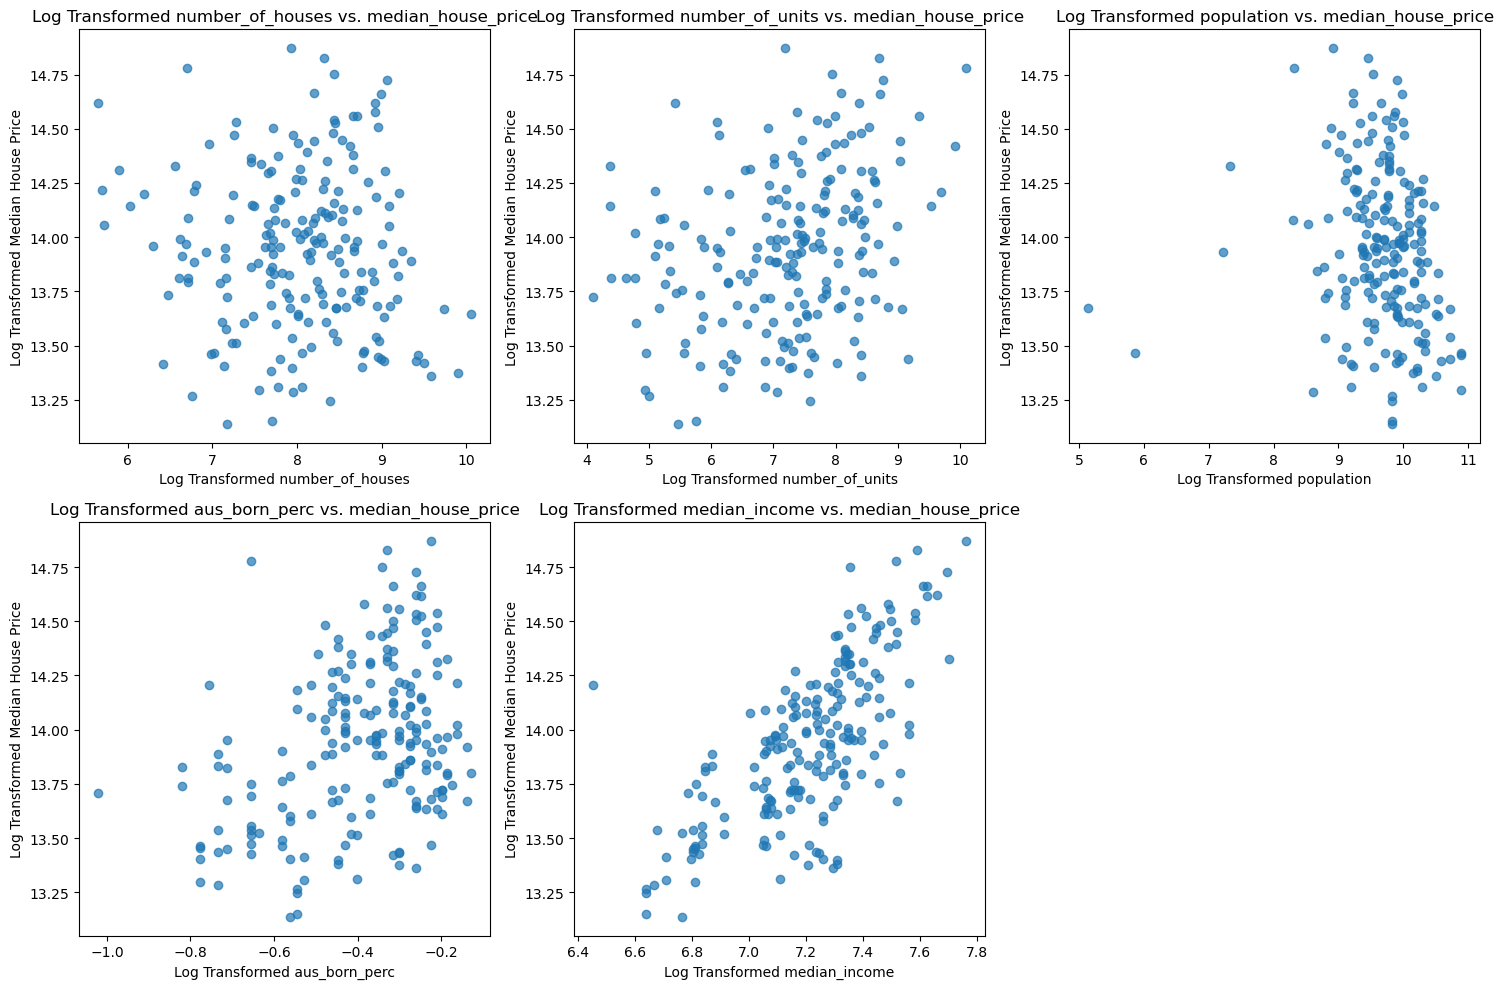

In [27]:
# Apply log transformation
suburb_data_log = suburb_data.copy()
suburb_data_log[columns_to_visualize] = np.log(suburb_data[columns_to_visualize])

# Plot scatter plots for each attribute against median_house_price after log transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data_log[col], suburb_data_log['median_house_price'], alpha=0.7)
    plt.title(f'Log Transformed {col} vs. median_house_price')
    plt.xlabel(f'Log Transformed {col}')
    plt.ylabel('Log Transformed Median House Price')

plt.tight_layout()
plt.show()

From the graphs, it is evident that the logarithmic transformation has altered the distribution and scale of the data, especially for features that had a right-skewed original distribution, such as number_of_houses, number_of_units, and population. For these features, the data appears more concentrated after the transformation, and the relationship with the median house price seems more linear.

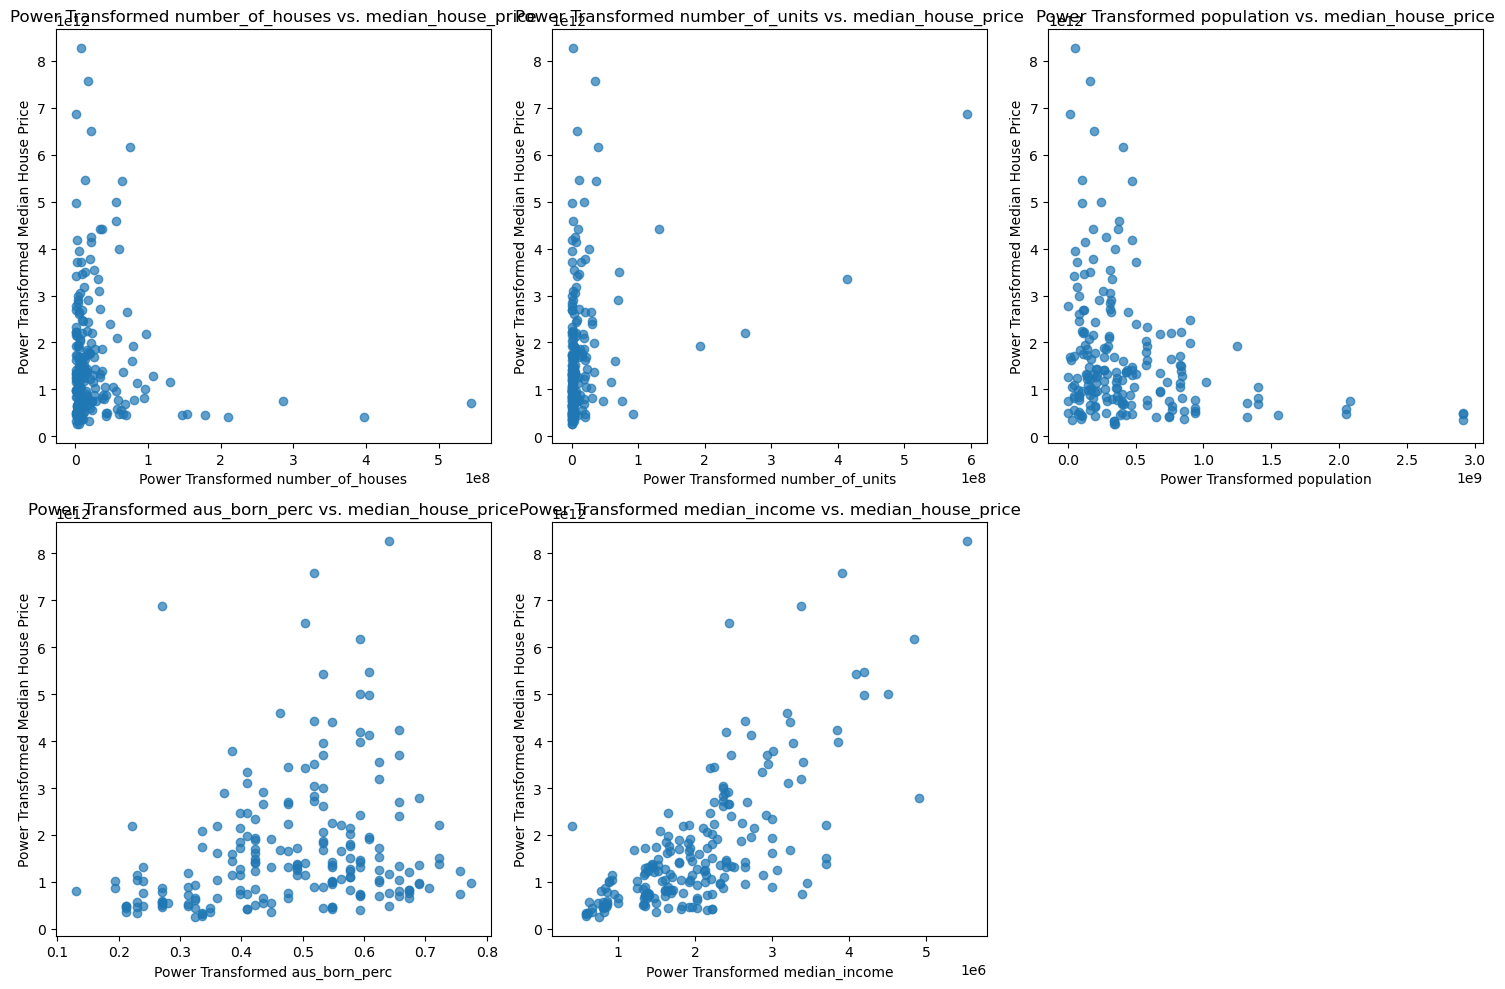

In [28]:
# Apply power transformation (square)
suburb_data_power = suburb_data.copy()
suburb_data_power[columns_to_visualize] = np.power(suburb_data[columns_to_visualize], 2)

# Plot scatter plots for each attribute against median_house_price after power transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data_power[col], suburb_data_power['median_house_price'], alpha=0.7)
    plt.title(f'Power Transformed {col} vs. median_house_price')
    plt.xlabel(f'Power Transformed {col}')
    plt.ylabel('Power Transformed Median House Price')

plt.tight_layout()
plt.show()

From the graphs, it can be observed that the power transformation (square transformation in this context) has had a significant impact on the distribution and scale of the data. For certain features, like number_of_units, the distribution of the data seems more concentrated after the transformation. However, the relationship with the target variable is still not very apparent in some cases.

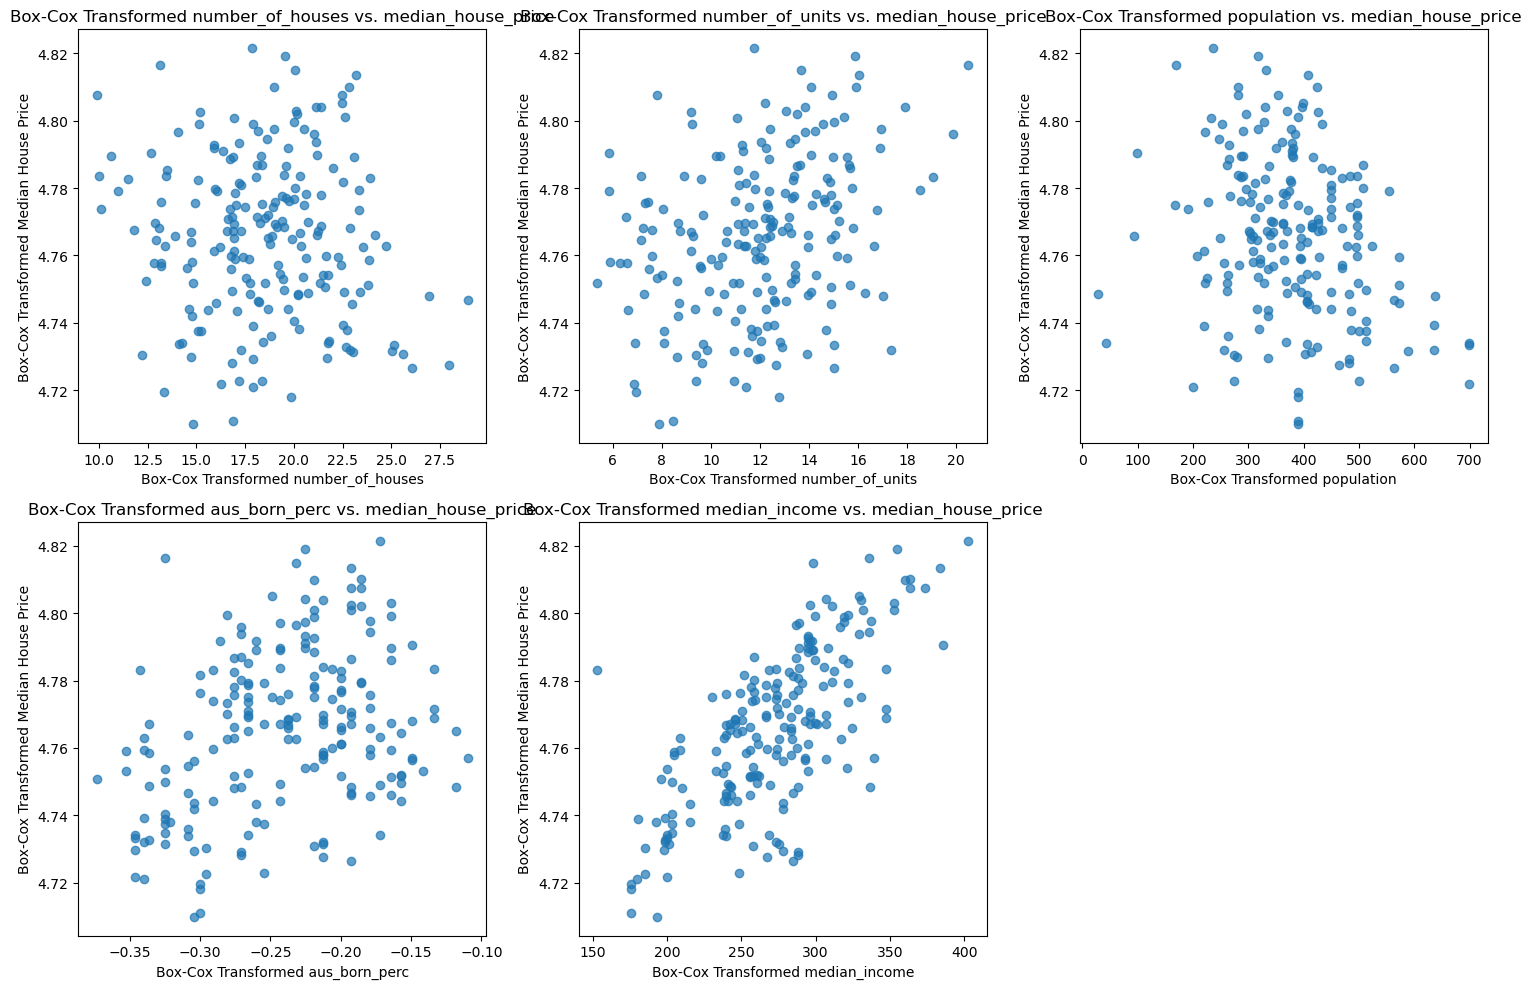

In [29]:
# Apply Box-Cox transformation
suburb_data_boxcox = suburb_data.copy()
for col in columns_to_visualize:
    suburb_data_boxcox[col], _ = boxcox(suburb_data[col])

# Plot scatter plots for each attribute against median_house_price after Box-Cox transformation
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize[:-1], 1):  # Exclude median_house_price for scatter plot
    plt.subplot(2, 3, i)
    plt.scatter(suburb_data_boxcox[col], suburb_data_boxcox['median_house_price'], alpha=0.7)
    plt.title(f'Box-Cox Transformed {col} vs. median_house_price')
    plt.xlabel(f'Box-Cox Transformed {col}')
    plt.ylabel('Box-Cox Transformed Median House Price')

plt.tight_layout()
plt.show()

The Box-Cox transformation brings the data closer to a normal distribution, potentially improving the performance of the model. From the graphs, it's evident that the data distribution is more concentrated after the transformation, and in some instances, the relationship with the median house price has become more pronounced.

-----

## Summary

**Standardization and Min-Max Normalization:** These methods primarily scale the data without altering its shape or its relationship with the target variable.<br>
**Log Transformation:** For right-skewed data, this transformation helps in reducing the influence of larger values, making the data more concentrated.<br>
**Power Transformation:** In my case, squaring had a noticeable impact on the data distribution, but the relationship with the target variable didn't improve significantly.<br>
**Box-Cox Transformation:** This transformation brought the data closer to a normal distribution, potentially aiding in the performance of the model.<br>
From the observations, the log transformation and Box-Cox transformation seem promising as they enhanced the data distribution and strengthened the relationship with the target variable.

-------------------------------------

<div class="alert alert-block alert-warning">

## 5. Summary <a class="anchor" name="summary"></a>

</div>

In today's data-centric era, integrating and parsing data from diverse sources have become imperative. This not only poses challenges but also opens avenues for extracting invaluable insights. This project is segmented into two pivotal tasks, focusing on refining, amalgamating, and optimizing the data to set a robust foundation for subsequent analyses and modeling.

Task 1 delves deep into the intricacies of integrating data from multiple sources into a cohesive dataset. Initially, with the aid of various libraries such as geopandas and shapely, data from different formats like JSON and XML were seamlessly imported and merged into a unified dataframe. This was followed by a series of data cleaning and transformations to ensure consistency and accuracy of the data.

Task 2 hones in on the aspect of data reshaping. A spectrum of normalization and transformation techniques, including standardization, min-max normalization, log transformation, power transformation, and Box-Cox transformation were explored. The application of these methods ensures that the data's form and distribution are conducive to the choice of analytical methods and yield optimal results.

Through the aforementioned steps, the data's integrity was not only ensured but also primed for further analysis and modeling.









-------------------------------------

<div class="alert alert-block alert-warning">

## 6. References <a class="anchor" name="Ref"></a>

</div>

## --------------------------------------------------------------------------------------------------------------------------